In [ ]:
import pandas as pd
import matplotlib as plt
import numpy as np
import seaborn as sb
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from matplotlib import pyplot as plt

In [ ]:

!git clone https://github.com/AsharZafar/Projects.git

Cloning into 'Projects'...
remote: Enumerating objects: 27, done.
remote: Counting objects: 100% (27/27), done.
remote: Compressing objects: 100% (23/23), done.
remote: Total 27 (delta 1), reused 3 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (27/27), 1.08 MiB | 7.45 MiB/s, done.
Resolving deltas: 100% (1/1), done.


In [ ]:
df=pd.read_csv("/content/Projects/house price predictaion/Bengaluru_House_Data.csv")

In [ ]:
df1=df.copy()

In [ ]:
df1.head(10)

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00
5,Super built-up Area,Ready To Move,Whitefield,2 BHK,DuenaTa,1170,2.0,1.0,38.00
6,Super built-up Area,18-May,Old Airport Road,4 BHK,Jaades,2732,4.0,NaN,204.00
7,Super built-up Area,Ready To Move,Rajaji Nagar,4 BHK,Brway G,3300,4.0,NaN,600.00
8,Super built-up Area,Ready To Move,Marathahalli,3 BHK,NaN,1310,3.0,1.0,63.25
9,Plot Area,Ready To Move,Gandhi Bazar,6 Bedroom,NaN,1020,6.0,NaN,370.00


In [ ]:
df1.isnull().sum()

,0
area_type,0
availability,0
location,1
size,16
society,5502
total_sqft,0
bath,73
balcony,609
price,0


In [ ]:
df1.groupby("area_type")["area_type"].agg("count")

,area_type
area_type,
Built-up Area,2418
Carpet Area,87
Plot Area,2025
Super built-up Area,8790


In [ ]:
df1["area_type"].value_counts()

,count
area_type,
Super built-up Area,8790
Built-up Area,2418
Plot Area,2025
Carpet Area,87


In [ ]:
df2=df1.drop(["area_type","availability","society","balcony"],axis=1)

In [ ]:
df2.head()

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Kothanur,2 BHK,1200,2.0,51.00


In [ ]:
df2.isnull().sum()

,0
location,1
size,16
total_sqft,0
bath,73
price,0


In [ ]:
df2_median=df2["bath"].median()

In [ ]:
df2["bath"].fillna(df2_median,inplace =True)
df2.head()

<ipython-input-13-27c6783294d3>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df2["bath"].fillna(df2_median,inplace =True)


,location,size,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Kothanur,2 BHK,1200,2.0,51.00


In [ ]:
df2.isnull().sum()

,0
location,1
size,16
total_sqft,0
bath,0
price,0


In [ ]:
df2.dropna(subset=['size'],inplace =True)
df2.dropna(subset=['location'],inplace =True)

In [ ]:
df2.isnull().sum()

,0
location,0
size,0
total_sqft,0
bath,0
price,0


In [ ]:
df2.head()

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Kothanur,2 BHK,1200,2.0,51.00


In [ ]:
df2["size"].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

In [ ]:

#splituslig lambda function using space after lambda x will carry values like 2 bhk then split function will be applied which will split with space and then use

df2["BHK"]=df2["size"].apply(lambda x: int(x.split(" ")[0]))

In [ ]:
df2.head()

,location,size,total_sqft,bath,price,BHK
0,Electronic City Phase II,2 BHK,1056,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00,4
2,Uttarahalli,3 BHK,1440,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00,3
4,Kothanur,2 BHK,1200,2.0,51.00,2


In [ ]:
df2["BHK"].unique()

array([ 2,  4,  3,  6,  1,  8,  7,  5, 11,  9, 27, 10, 19, 16, 43, 14, 12,
       13, 18])

In [ ]:
df2[df2["BHK"]>20]

,location,size,total_sqft,bath,price,BHK
1718,2Electronic City Phase II,27 BHK,8000,27.0,230.0,27
4684,Munnekollal,43 Bedroom,2400,40.0,660.0,43


In [ ]:
df2.total_sqft.unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

In [ ]:
def is_float(x):
  try:
    float(x)
  except:
    return False
  return True

df2[~df2["total_sqft"].apply(is_float)].head()

,location,size,total_sqft,bath,price,BHK
30,Yelahanka,4 BHK,2100 - 2850,4.0,186.000,4
56,Devanahalli,4 Bedroom,3010 - 3410,2.0,192.000,4
81,Hennur Road,4 Bedroom,2957 - 3450,2.0,224.500,4
122,Hebbal,4 BHK,3067 - 8156,4.0,477.000,4
137,8th Phase JP Nagar,2 BHK,1042 - 1105,2.0,54.005,2


In [ ]:
def sqrt_to_num(x):
  token=x.split("-")
  if len(token)==2:
    return (float(token[0])+float(token[1]))/2

  try:
    return float(x)
  except:
    return None


In [ ]:
df3=df2.copy()

In [ ]:

df3['total_sqft']=df['total_sqft'].apply(sqrt_to_num)
df3.head()

,location,size,total_sqft,bath,price,BHK
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3
4,Kothanur,2 BHK,1200.0,2.0,51.00,2


In [ ]:
df3.loc[30]

,30
location,Yelahanka
size,4 BHK
total_sqft,2475.0
bath,4.0
price,186.0
BHK,4


In [ ]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Index: 13303 entries, 0 to 13319
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   location    13303 non-null  object 
 1   size        13303 non-null  object 
 2   total_sqft  13257 non-null  float64
 3   bath        13303 non-null  float64
 4   price       13303 non-null  float64
 5   BHK         13303 non-null  int64  
dtypes: float64(3), int64(1), object(2)
memory usage: 1.2+ MB


In [ ]:
df4=df3.copy()

In [ ]:
#making price/area column
df4["price/sqft"]=df4["price"]*100000/df4["total_sqft"]


In [ ]:
df4.head()

,location,size,total_sqft,bath,price,BHK,price/sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000


In [ ]:
len(df4.location.unique())

1304

In [ ]:
#df4.location=df.location.apply(lambda x: x.strip())

In [ ]:
df4.isnull().sum()

,0
location,0
size,0
total_sqft,46
bath,0
price,0
BHK,0
price/sqft,46


In [ ]:
df4_median=df4["total_sqft"].median()
df4.fillna(df4_median,inplace=True)

In [ ]:
df4.isnull().sum()

,0
location,0
size,0
total_sqft,0
bath,0
price,0
BHK,0
price/sqft,0


In [ ]:
#df4.location=df.location.apply(lambda x: x.strip())

In [ ]:
df4['location'] = df['location'].apply(lambda x: x.strip() if isinstance(x, str) else x)

In [ ]:
df4.head()

,location,size,total_sqft,bath,price,BHK,price/sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000


In [ ]:
df4_stats=df4.groupby("location")["location"].agg("count").sort_values(ascending=False)
df4_stats

,location
location,
Whitefield,540
Sarjapur Road,397
Electronic City,304
Kanakpura Road,273
Thanisandra,237
...,...
1 Giri Nagar,1
"Kanakapura Road,",1
Kanakapura main Road,1


In [ ]:
len(df4_stats<10)

1293

In [ ]:
df4_stats_lsess_than_10=df4_stats[df4_stats<=10]
df4_stats_lsess_than_10

,location
location,
Basapura,10
1st Block Koramangala,10
Gunjur Palya,10
Kalkere,10
Sector 1 HSR Layout,10
...,...
1 Giri Nagar,1
"Kanakapura Road,",1
Kanakapura main Road,1


In [ ]:
df4['location'] = df4['location'].apply(lambda x: "other" if x in df4_stats_lsess_than_10 else x)

len(df4.location.unique())

242

In [ ]:
df4.head()

,location,size,total_sqft,bath,price,BHK,price/sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000


In [ ]:
df4[df4.total_sqft/df4.BHK<300].head()


,location,size,total_sqft,bath,price,BHK,price/sqft
9,other,6 Bedroom,1020.0,6.0,370.0,6,36274.509804
45,HSR Layout,8 Bedroom,600.0,9.0,200.0,8,33333.333333
58,Murugeshpalya,6 Bedroom,1407.0,4.0,150.0,6,10660.980810
68,Devarachikkanahalli,8 Bedroom,1350.0,7.0,85.0,8,6296.296296
70,other,3 Bedroom,500.0,3.0,100.0,3,20000.000000


In [ ]:
df4.shape

(13303, 7)

In [ ]:
df5=df4[~(df4.total_sqft/df4.BHK<300)]
df5.shape

(12551, 7)

In [ ]:
def remove_outliers(df):
  df_out=pd.DataFrame()
  for key,subdf in df.groupby("location"):
    m=np.mean(subdf["price/sqft"])
    std=np.std(subdf["price/sqft"])
    reduced_df=subdf[(subdf["price/sqft"]>(m-std))&(subdf["price/sqft"]<=(m+std))]
    df_out=pd.concat([df_out,reduced_df],ignore_index=True)
  return df_out

df6=remove_outliers(df5)
df6.shape


(10316, 7)

In [ ]:
#df6.location.unique()

In [ ]:
df6_stats=df6.groupby("location")["location"].agg("count").sort_values(ascending=False)
df6_stats

,location
location,
other,2317
Whitefield,484
Sarjapur Road,301
Electronic City,279
Kanakpura Road,196
...,...
Banjara Layout,4
Vishwapriya Layout,4
HAL 2nd Stage,4


In [ ]:
import matplotlib.pyplot as plt
def scatter_plot(df,location):
   BHK2=df[(df.location==location)&(df.BHK==2)]
   BHK3=df[(df.location==location)&(df.BHK==3)]

   plt.rcParams["figure.figsize"] = (15, 10)

   plt.scatter(BHK2["total_sqft"],BHK2.price,color='blue',label='2BHK', s=50)
   plt.scatter(BHK3["total_sqft"],BHK3.price,marker="+",color='red',label='3BHK', s=50)
   plt.xlabel("Total_sqft_area")
   plt.ylabel("price")
   plt.title("location")
   plt.legend()


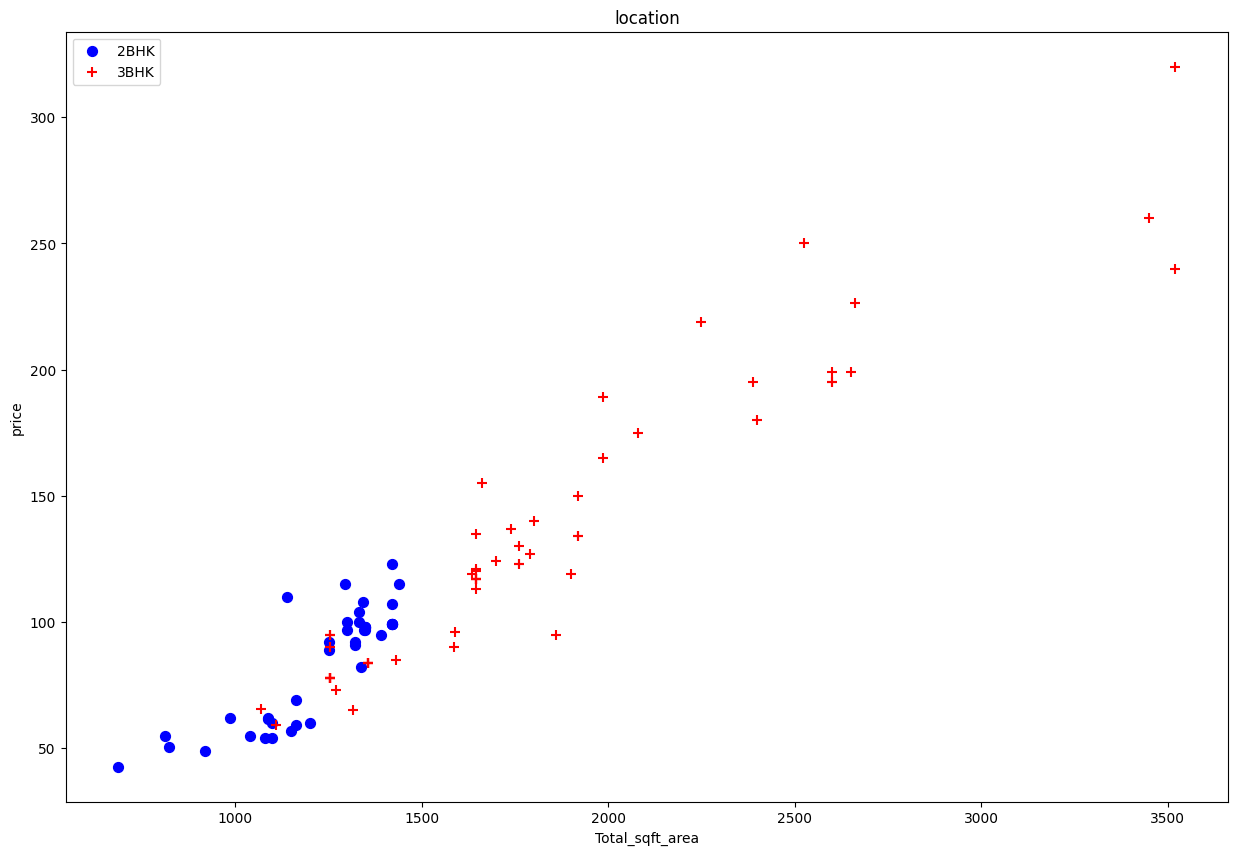

In [ ]:
scatter_plot(df6,"Hebbal")
# we could see that some of the 2bhk price alot higher than 3 bhk

In [ ]:
def remove_bhk_outliers(df):
  exclude_indices=np.array([])
  for location,location_df in df.groupby("location"):
    bhk_stats={}
    for bhk,bhk_df in location_df.groupby("BHK"):
      bhk_stats[bhk]={
          "mean":np.mean(bhk_df["price/sqft"]),
          "std" :np.std(bhk_df["price/sqft"]),
          "count":bhk_df.shape[0]
      }
    for bhk,bhk_df in location_df.groupby("BHK"):
      stats=bhk_stats.get(bhk-1)
      if stats and stats["count"]>5:
        exclude_indices=np.append(exclude_indices,bhk_df[bhk_df["price/sqft"]<(stats["mean"])].index.values)
  return df.drop(exclude_indices,axis="index")


In [ ]:
df7=remove_bhk_outliers(df6)
df7.shape

(7394, 7)

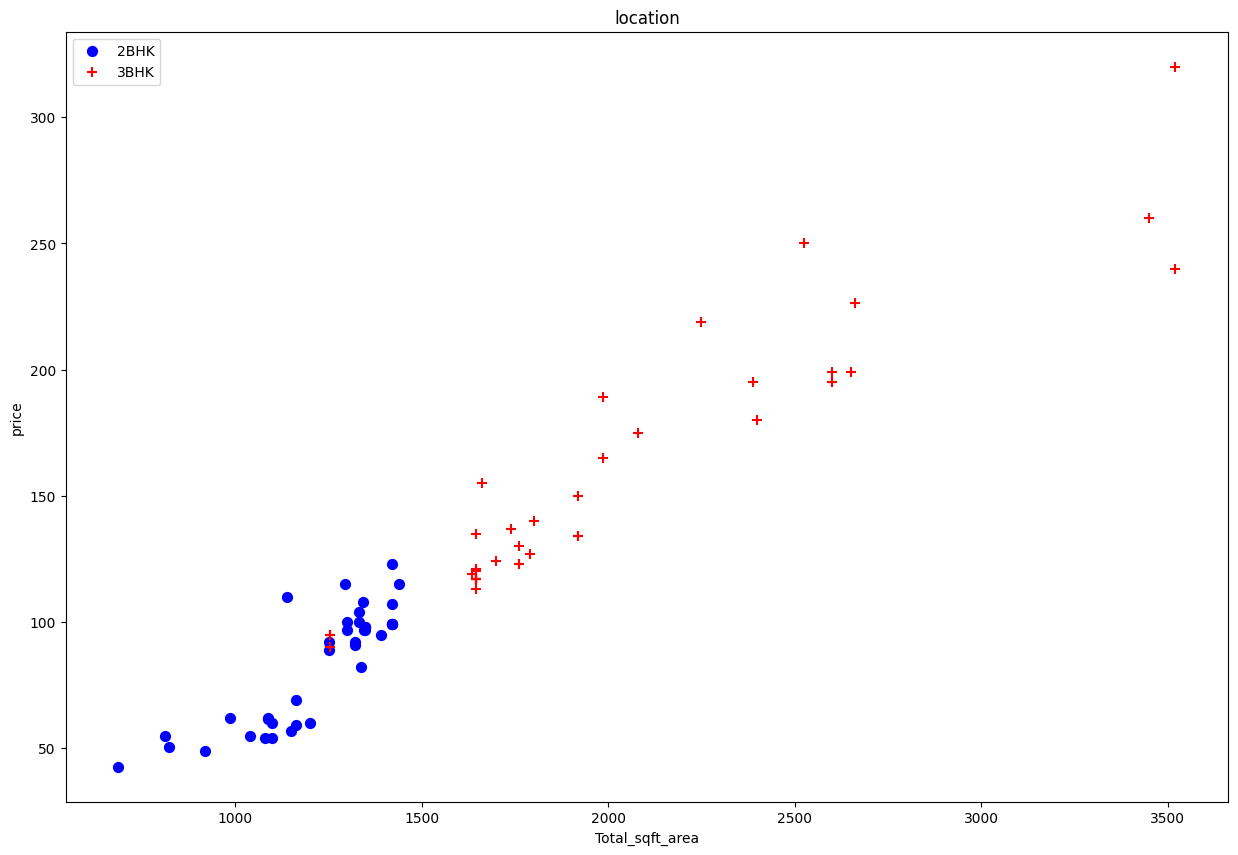

In [ ]:
scatter_plot(df7,"Hebbal")

Text(0, 0.5, 'count')

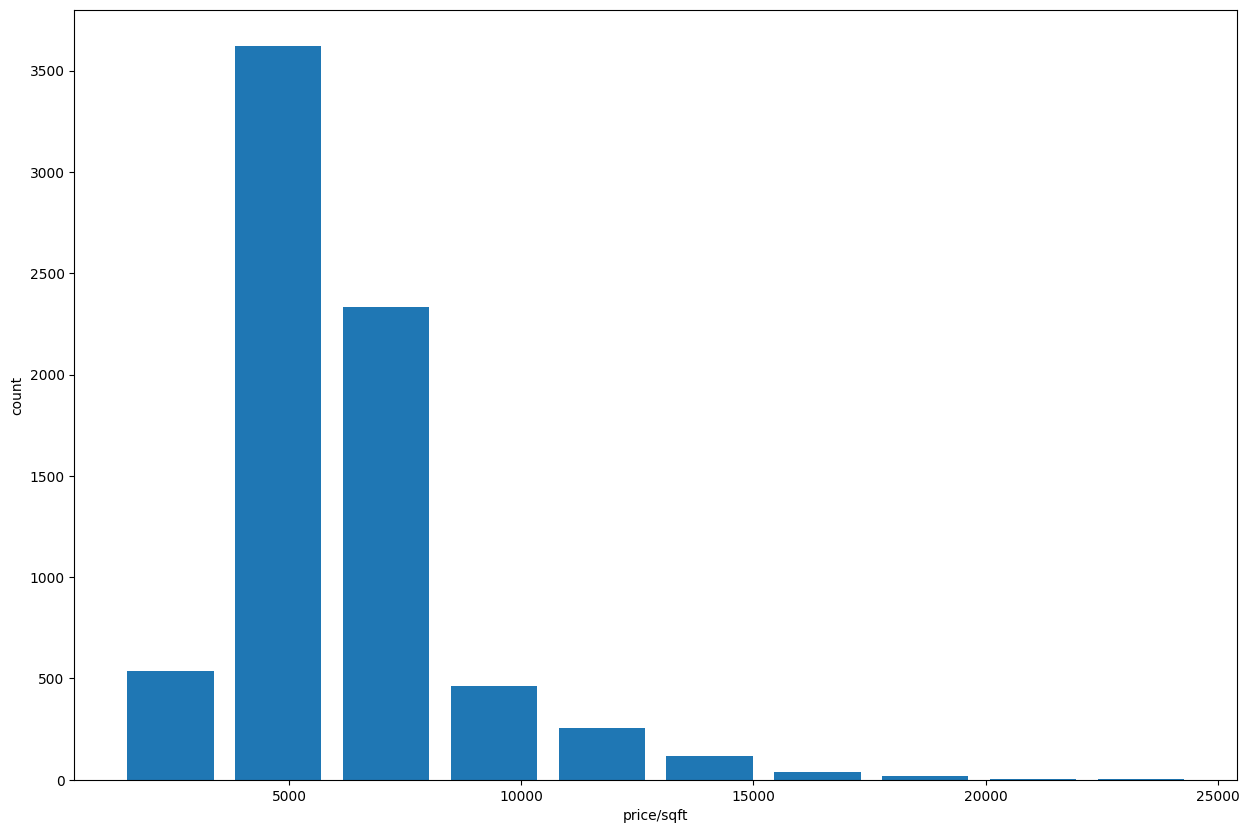

In [ ]:
plt.hist(df7['price/sqft'],rwidth=0.8)
plt.rcParams["figure.figsize"] = (10, 10)
plt.xlabel("price/sqft")
plt.ylabel("count")

In [ ]:
df7.bath.unique()

array([ 4.,  3.,  2.,  5.,  8.,  1.,  6.,  7.,  9., 12., 16., 13.])

In [ ]:
df7[df7.bath>10]

,location,size,total_sqft,bath,price,BHK,price/sqft
5321,Neeladri Nagar,10 BHK,4000.0,12.0,160.0,10,4000.000000
8551,other,10 BHK,12000.0,12.0,525.0,10,4375.000000
8640,other,16 BHK,10000.0,16.0,550.0,16,5500.000000
9376,other,11 BHK,6000.0,12.0,150.0,11,2500.000000
9708,other,13 BHK,5425.0,13.0,275.0,13,5069.124424


Text(0, 0.5, 'count')

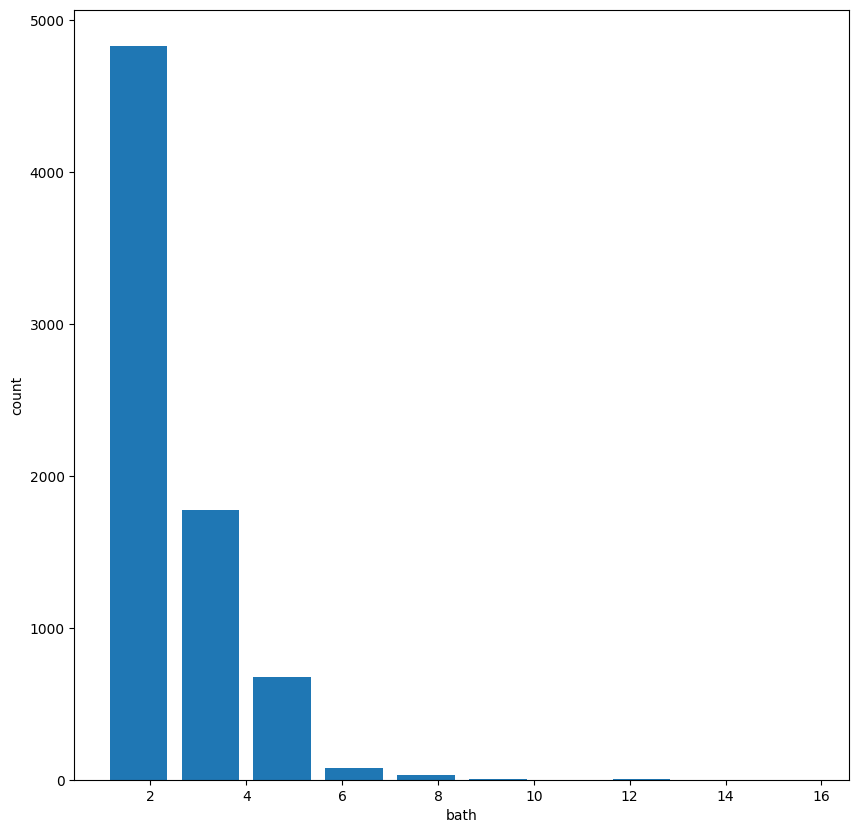

In [ ]:
plt.hist(df7.bath,rwidth=0.8)
plt.rcParams["figure.figsize"]=(5,10)
plt.xlabel("bath")
plt.ylabel("count")

In [ ]:
#dropping bathes greater than 2
df8=df7[df7.bath<df7.BHK+2]
df8.shape

(7316, 7)

In [ ]:
df

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00
...,...,...,...,...,...,...,...,...,...
13315,Built-up Area,Ready To Move,Whitefield,5 Bedroom,ArsiaEx,3453,4.0,0.0,231.00
13316,Super built-up Area,Ready To Move,Richards Town,4 BHK,NaN,3600,5.0,NaN,400.00
13317,Built-up Area,Ready To Move,Raja Rajeshwari Nagar,2 BHK,Mahla T,1141,2.0,1.0,60.00
13318,Super built-up Area,18-Jun,Padmanabhanagar,4 BHK,SollyCl,4689,4.0,1.0,488.00


**getting ready for ml training**

In [ ]:
df9=df8.drop(["size","price/sqft"],axis=1)
df9.head()

,location,total_sqft,bath,price,BHK
0,1st Block Jayanagar,2850.0,4.0,428.0,4
1,1st Block Jayanagar,1630.0,3.0,194.0,3
2,1st Block Jayanagar,1875.0,2.0,235.0,3
3,1st Block Jayanagar,1200.0,2.0,130.0,3
4,1st Block Jayanagar,1235.0,2.0,148.0,2


In [ ]:
df9.head()

,location,total_sqft,bath,price,BHK
0,1st Block Jayanagar,2850.0,4.0,428.0,4
1,1st Block Jayanagar,1630.0,3.0,194.0,3
2,1st Block Jayanagar,1875.0,2.0,235.0,3
3,1st Block Jayanagar,1200.0,2.0,130.0,3
4,1st Block Jayanagar,1235.0,2.0,148.0,2


In [ ]:
'''#label encoding
#label_encoder = LabelEncoder()
#df9['location'] = label_encoder.fit_transform(df9['location'])
#df9['location'] = label_encoder.fit_transform(df9['location'])'''

"#label encoding\n#label_encoder = LabelEncoder()\n#df9['location'] = label_encoder.fit_transform(df9['location'])\n#df9['location'] = label_encoder.fit_transform(df9['location'])"

In [ ]:
# Create dummy variables for 'location' column
location_dummies = pd.get_dummies(df9['location']).astype(int)

# Concatenate the original df9 (dropping the 'location' column) with the dummy variables
df9 = pd.concat([df9.drop('location', axis=1), location_dummies], axis=1)


In [ ]:
# df9=pd.get_dummies(df9.location).astype(int)

In [ ]:
df9.head()

,total_sqft,bath,price,BHK,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,...,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,other
0,2850.0,4.0,428.0,4,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1630.0,3.0,194.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1875.0,2.0,235.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1200.0,2.0,130.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1235.0,2.0,148.0,2,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
df9.columns

Index(['total_sqft', 'bath', 'price', 'BHK', '1st Block Jayanagar',
       '1st Phase JP Nagar', '2nd Phase Judicial Layout',
       '2nd Stage Nagarbhavi', '5th Block Hbr Layout', '5th Phase JP Nagar',
       ...
       'Vishveshwarya Layout', 'Vishwapriya Layout', 'Vittasandra',
       'Whitefield', 'Yelachenahalli', 'Yelahanka', 'Yelahanka New Town',
       'Yelenahalli', 'Yeshwanthpur', 'other'],
      dtype='object', length=246)

**ML**

In [ ]:
X=df9.drop("price",axis=1)
X.head(3)

,total_sqft,bath,BHK,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,...,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,other
0,2850.0,4.0,4,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1630.0,3.0,3,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1875.0,2.0,3,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
Y=df9.price
Y.head(1)

,price
0,428.0


In [ ]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=55)


In [ ]:
regressor=LinearRegression()
regressor.fit(X_train,Y_train)
regressor.score(X_test,Y_test)

0.8933770564689306

In [ ]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)

# Cross-validation ka amal
scores = cross_val_score(LinearRegression(), X, Y, cv=cv)
scores

array([0.84246129, 0.8417004 , 0.88559649, 0.89740128, 0.76776437])

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor

models={
    "linear_regresor":{
      "model":LinearRegression(),
      "params":{
      "normalize":[True,False]
    }},
    "lasso":{
    "model":Lasso(),
    "params":{
        "alpha":[1,2],
        "selection":["random","cycle"]
    }},

    "DecisionTree":{
        "model":DecisionTreeRegressor(),
        "params":{
            "criterion":["mse","friedman_mse"],
            "splitter" :["best","random"]

        }
    }
}


In [ ]:
models = {
    "linear_regressor": {
        "model": LinearRegression(),
        "params": {
        #"normalize":[True,False]
        }
    },
    "lasso": {
        "model": Lasso(),
        "params": {
            "alpha": [1, 2],
            "selection": ["random", "cyclic"]  # Correct spelling for 'cyclic'
        }
    },
    "DecisionTree": {
        "model": DecisionTreeRegressor(),
        "params": {
            "criterion": ["squared_error", "friedman_mse"],  # Updated criterion values
            "splitter": ["best", "random"]
        }
    }
}


In [ ]:
import pandas as pd
from sklearn.model_selection import GridSearchCV, ShuffleSplit

# Function Definition
def find_best_model_using_gridsearchcv(X, Y):
    scores = []
    cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)

    for algo_name, config in models.items():
        gs = GridSearchCV(config["model"], config["params"], cv=cv, return_train_score=False)
        gs.fit(X, Y)
        scores.append({
            "model": algo_name,
            "best_score": gs.best_score_,
            "best_params": gs.best_params_
        })

    # Return the DataFrame after the loop
    return pd.DataFrame(scores, columns=["model", "best_score", "best_params"])


find_best_model_using_gridsearchcv(X, Y)


,model,best_score,best_params
0,linear_regressor,0.846985,{}
1,lasso,0.725562,"{'alpha': 1, 'selection': 'random'}"
2,DecisionTree,0.740506,"{'criterion': 'friedman_mse', 'splitter': 'best'}"


In [ ]:
X.columns

Index(['total_sqft', 'bath', 'BHK', '1st Block Jayanagar',
       '1st Phase JP Nagar', '2nd Phase Judicial Layout',
       '2nd Stage Nagarbhavi', '5th Block Hbr Layout', '5th Phase JP Nagar',
       '6th Phase JP Nagar',
       ...
       'Vishveshwarya Layout', 'Vishwapriya Layout', 'Vittasandra',
       'Whitefield', 'Yelachenahalli', 'Yelahanka', 'Yelahanka New Town',
       'Yelenahalli', 'Yeshwanthpur', 'other'],
      dtype='object', length=245)

In [ ]:
lr_clf = LinearRegression()
lr_clf.fit(X, Y)

LinearRegression()

In [ ]:
def predict_price(location,sqft,bath,BHK):
  loc_index=np.where(X.columns==location)[0][0]

  #if len(loc_index) == 0:  # Location not found
     #   print(f"Location '{location}' not found in the dataset.")
       # return None  # Handle it gracefully

  x_input=np.zeros(len(X.columns))
  x_input[0]=sqft
  x_input[1]=bath
  x_input[2]=BHK
  if loc_index>=0:
    x_input[loc_index]=1
  return lr_clf.predict([x_input])[0]

In [ ]:
predict_price('1st Block Jayanagar',100,2,3)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


118.49236818088482

In [ ]:
import os
import pickle


file_path = "/content/Projects/house price predictaion.pickle"

# Ensure the directory exists
os.makedirs(os.path.dirname(file_path), exist_ok=True)


with open(file_path, "wb") as f:
    pickle.dump(lr_clf, f)

print("Model saved successfully!")


Model saved successfully!


In [ ]:
import json
file_path = "/content/Projects/house price prediction.json"
columns={
    'data_columns': [col.lower() for col in X.columns]
}
with open("columns.json","w") as f:
  f.write(json.dumps(columns))

**Python Flask Server**